## 1. install tensorflow 

In [24]:
!pip install tensorflow
!pip install matplotlib
!pip install tf-keras-vis



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


## 2. keras classifier pipeline

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# tf-keras-vis imports
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear


def classify(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = resnet50.preprocess_input(img_batch)

    # Load ResNet50 model (pretrained on ImageNet)
    model = resnet50.ResNet50()

    # Make predictions
    prediction = model.predict(img_preprocessed)
    pred_class = np.argmax(prediction[0])

    # Decode and print top-3 predictions
    print(resnet50.decode_predictions(prediction, top=3)[0])
    
    return model, img_preprocessed, pred_class

# usage
classify("./image_data.png")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step
[('n02123045', 'tabby', np.float32(0.4986208)), ('n02124075', 'Egyptian_cat', np.float32(0.17687717)), ('n02123159', 'tiger_cat', np.float32(0.06452155))]


(<Functional name=resnet50, built=True>,
 array([[[[ 125.061    ,  112.221    ,  105.32     ],
          [ 130.061    ,  117.221    ,  110.32     ],
          [ 130.061    ,  117.221    ,  110.32     ],
          ...,
          [ 130.061    ,  117.221    ,  110.32     ],
          [ 125.061    ,  112.221    ,  105.32     ],
          [ 146.061    ,  133.22101  ,  126.32     ]],
 
         [[ -58.939003 ,  -77.779    ,  -94.68     ],
          [ -43.939003 ,  -64.779    ,  -85.68     ],
          [ -44.939003 ,  -65.779    ,  -87.68     ],
          ...,
          [ -63.939003 ,  -80.779    ,  -94.68     ],
          [ -78.939    ,  -95.779    , -107.68     ],
          [ 128.061    ,  115.221    ,  108.32     ]],
 
         [[ -41.939003 ,  -63.779    ,  -91.68     ],
          [ -12.939003 ,  -39.779    ,  -68.68     ],
          [ -12.939003 ,  -41.779    ,  -70.68     ],
          ...,
          [ -42.939003 ,  -62.779    ,  -88.68     ],
          [ -71.939    ,  -87.779    , -103.

## 3. activation maps

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step
[('n02123045', 'tabby', np.float32(0.4986208)), ('n02124075', 'Egyptian_cat', np.float32(0.17687717)), ('n02123159', 'tiger_cat', np.float32(0.06452155))]


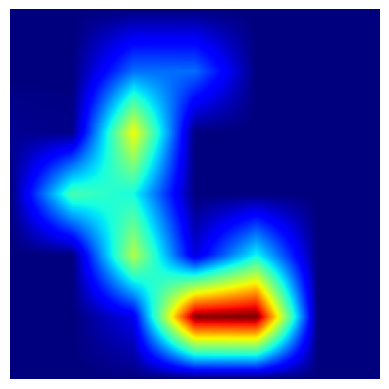

In [ ]:
def generate_heatmap(model, img_preprocessed, pred_class):
    
    gradcam = Gradcam(model, model_modifier=ReplaceToLinear(), clone=True)
    score = CategoricalScore([pred_class])

    # Generate heatmap
    cam = gradcam(score, img_preprocessed, penultimate_layer=-1)

    # cam has shape (1, H, W); remove batch dimension
    heatmap = cam[0]

    # Display
    plt.imshow(heatmap, cmap='jet')
    plt.axis('off')
    plt.show()

# usage
model, img_preprocessed, pred_class = classify("./image_data.png")
generate_heatmap(model, img_preprocessed, pred_class)